In [9]:
import open3d as o3d
import open3d_tutorial as o3dtut
import numpy as np
import matplotlib.pyplot as plt

###### When collecting data from scanning devices, the resulting point cloud tends to contain noise and artifacts that one would like to remove.
Here we are going to address the outlier removal features of Open3d

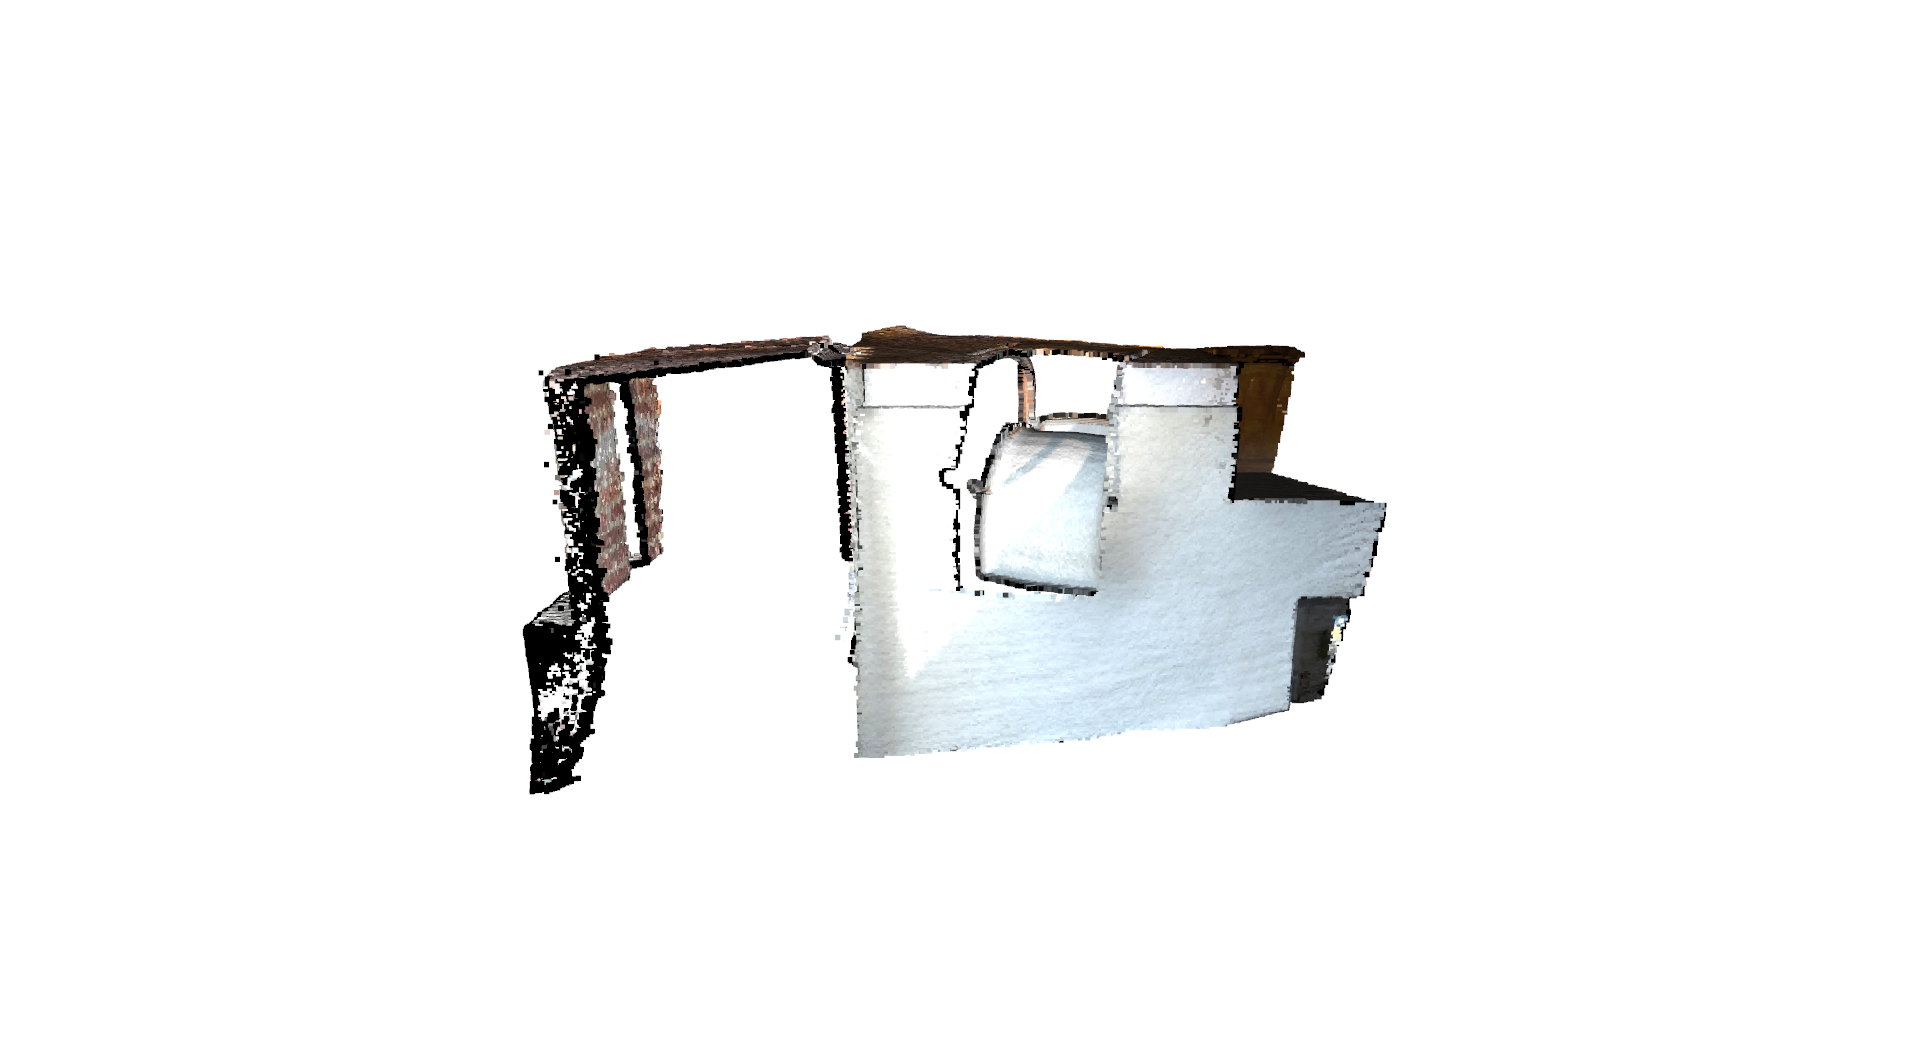

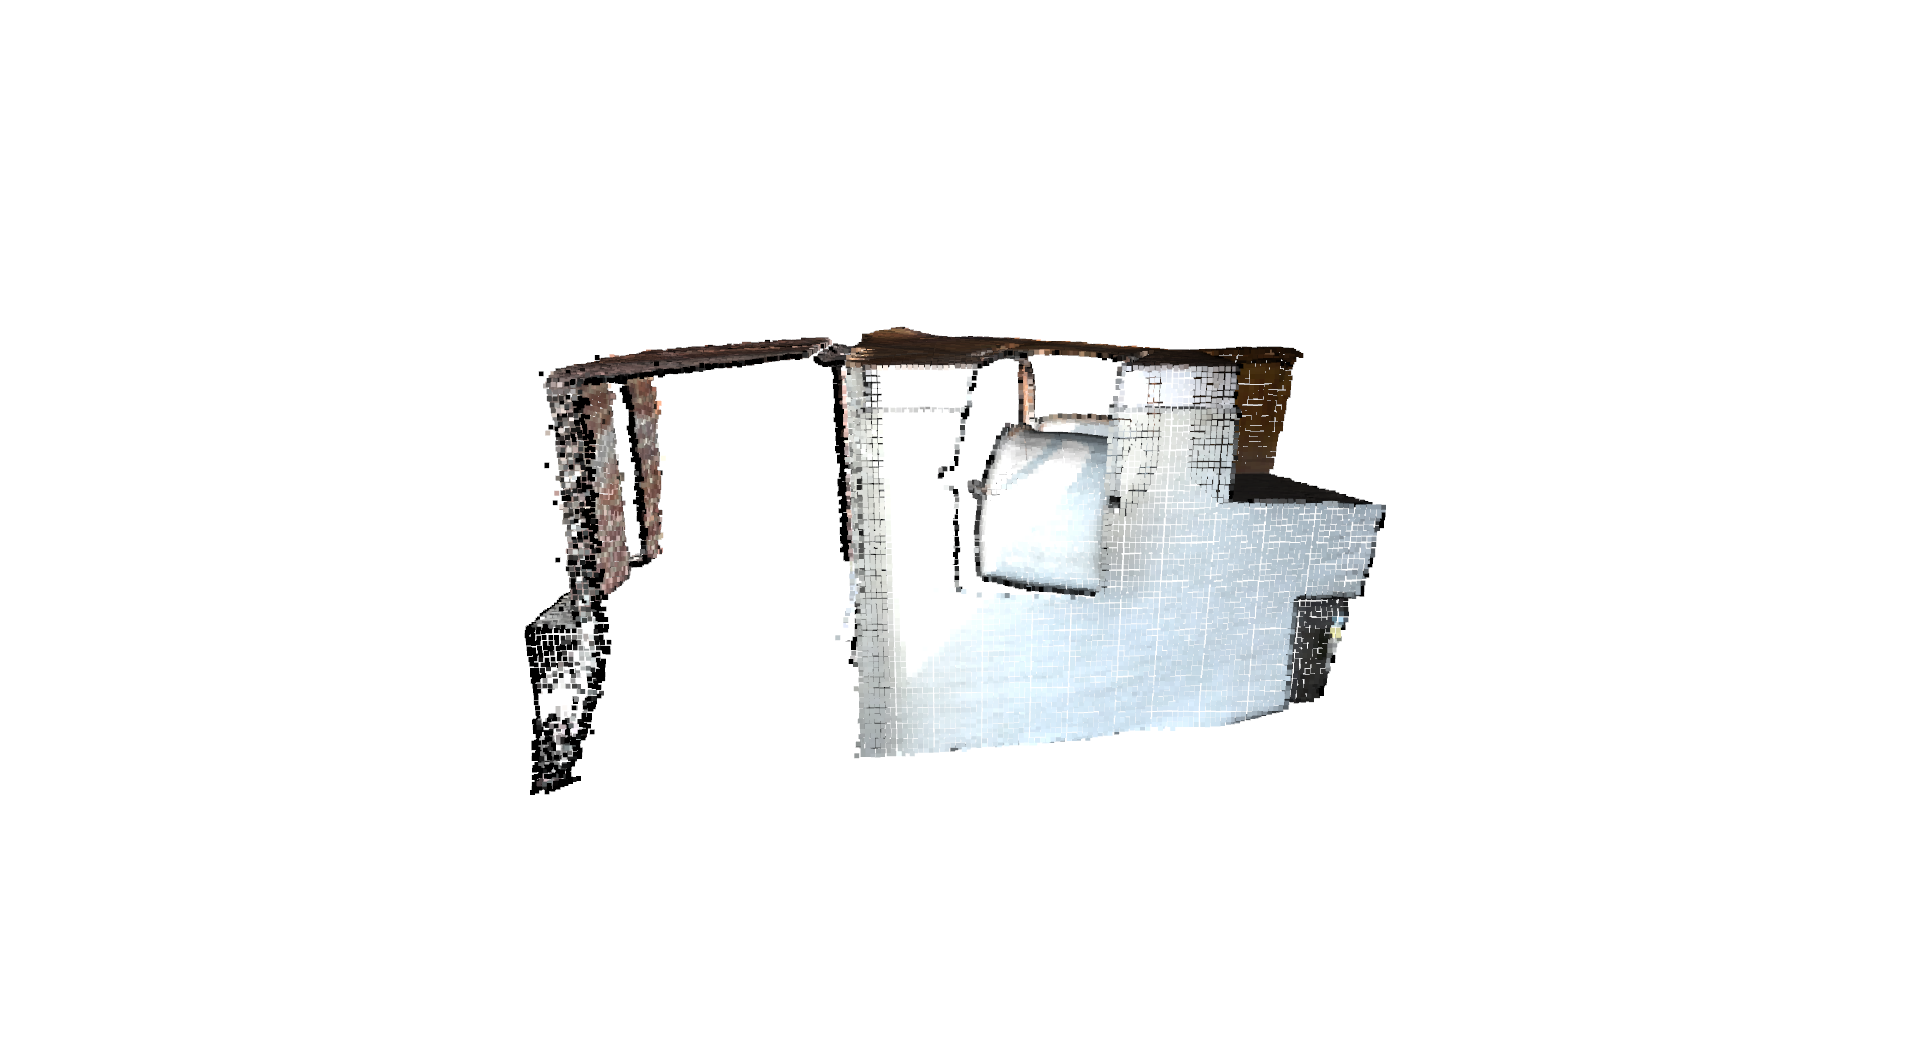

In [26]:
#load the data and reduce the points by voxel downsampling
pcd = o3d.io.read_point_cloud("C:/Users/inv-lab/OneDrive - YAMAHA MOTOR CO., LTD/Desktop/Ashutosh_work/Open3D-master/examples/test_data/ICP/cloud_bin_2.pcd")
o3d.visualization.draw_geometries([pcd])

pcd_down = pcd.voxel_down_sample(voxel_size = 0.02)
o3d.visualization.draw_geometries([pcd_down])

###### Select Down Sample 
The function below uses select_by_index which takes a binary mask to output only the selected points. The selected points and the non-selected are visualized.

In [27]:
def display_inlier_outlier(cloud,ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert = True)
    
    print("Showing outliers as RED and inliers as GREY")
    outlier_cloud.paint_uniform_color([1,0,0])
    inlier_cloud.paint_uniform_color([0.8,0.8,0.8])
    o3d.visualization.draw_geometries([inlier_cloud,outlier_cloud])

Statistical outlier removal
Showing outliers as RED and inliers as GREY


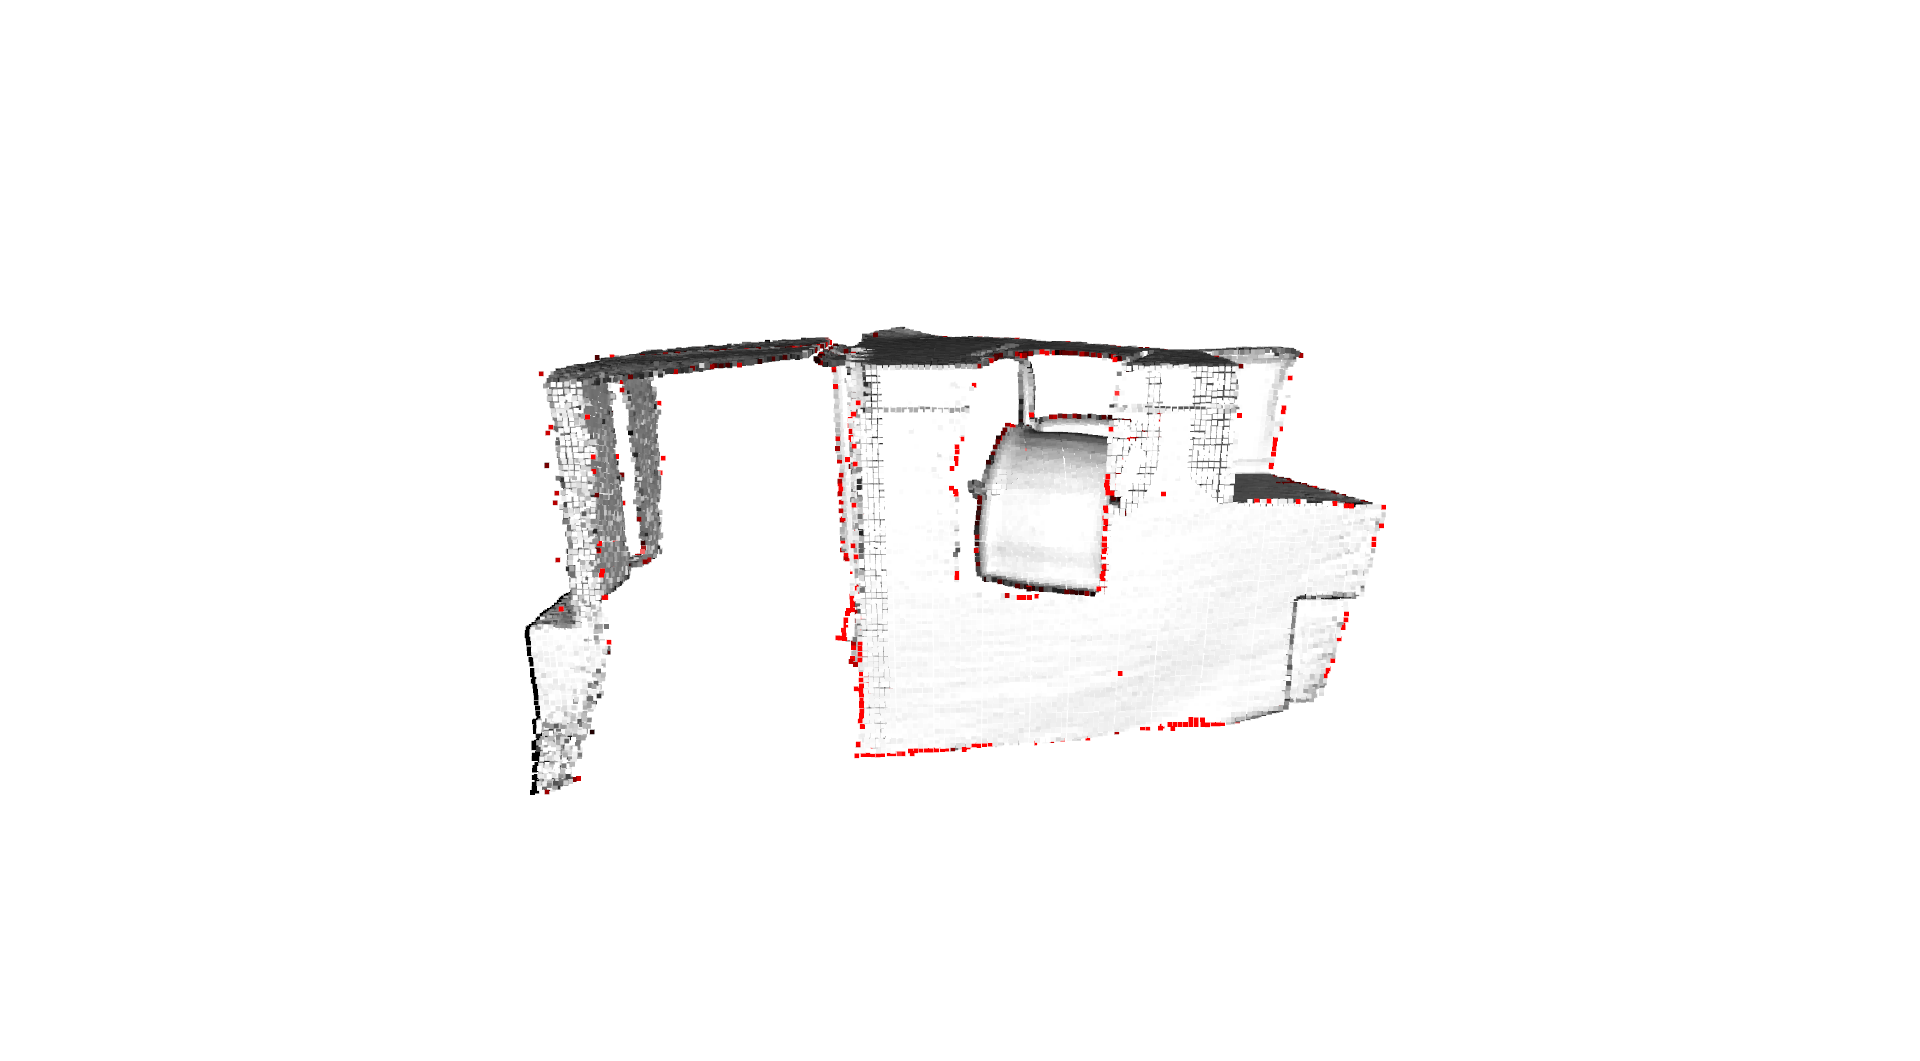

In [28]:
print("Statistical outlier removal")
cl, ind = pcd_down.remove_statistical_outlier(nb_neighbors=20,std_ratio=2.0)

display_inlier_outlier(pcd_down,ind)

###### RADIUS OUTLIER REMOVAL

Showing outliers as RED and inliers as GREY


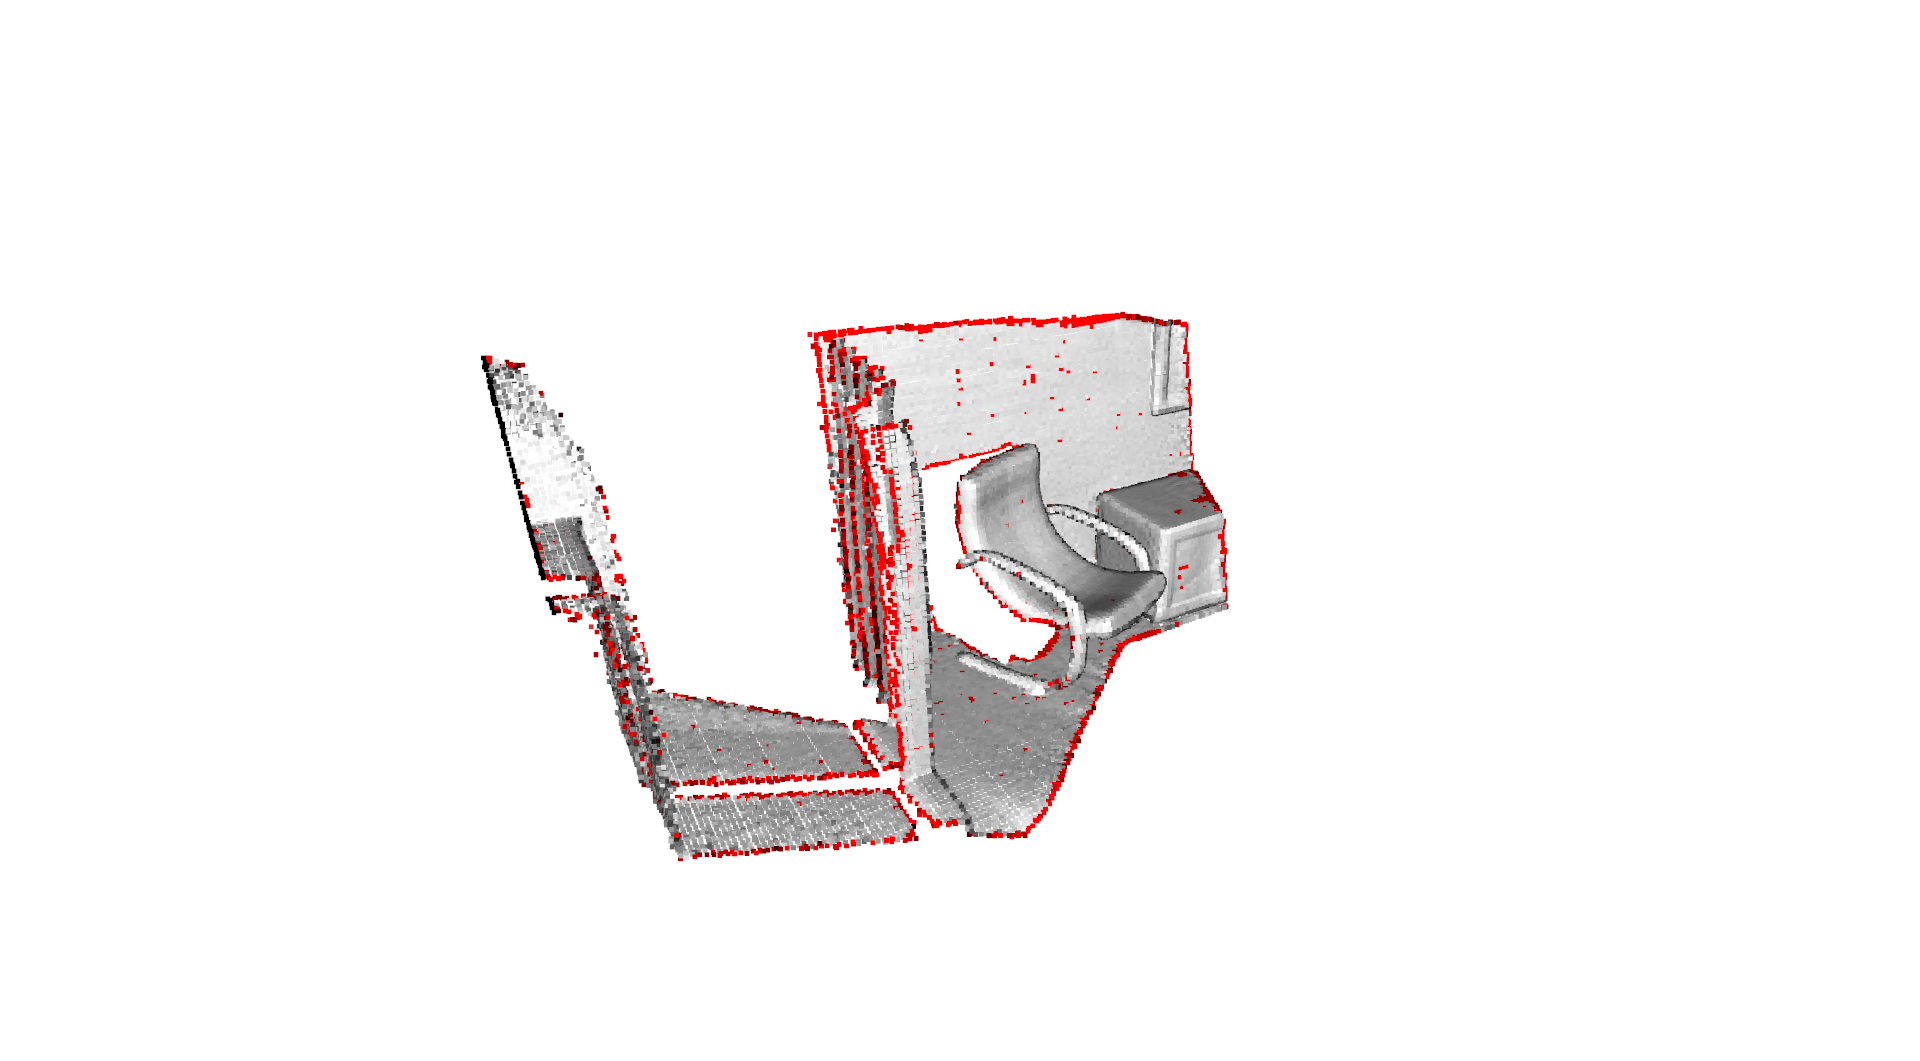

In [36]:
cl, ind = pcd_down.remove_radius_outlier(nb_points=20, radius=0.05)
display_inlier_outlier(pcd_down, ind)